In [1]:
def number_of_sentences(path):
    num_sentence = 0 # 设置存放数量的变量
    with open(path, 'r', encoding='utf-8') as f:
        for row in f.readlines(): # 遍历每一行数据
            if not row.strip(): # 如果该行是空，说明是两个句子的分割点
                num_sentence += 1  # 句子数量加1
    return num_sentence + 1  # 最后还需加1

In [2]:
train_path = 'ResumeNER/train.char.bmes'
dev_path = 'ResumeNER/dev.char.bmes'
test_path = 'ResumeNER/test.char.bmes'
number_of_sentences(train_path)

3821

In [3]:
number_of_sentences(dev_path)

463

In [4]:
number_of_sentences(test_path)

477

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def max_min_mean_std(path):
    sentence_len = []  # 用来存储每个句子的长度
    sentence = []  # 句子暂存器
    with open(path, 'r', encoding='utf-8') as f:
        for row in f.readlines():  # 读取每一行
            if row.strip():
                # 在没遇到空字符之前把字逐一放进暂存器
                sentence.append(row.strip())
            else:
                # 遇到空字符，计算句子长度并保存，置句子暂存列表为空
                sentence_len.append(len(sentence))
                sentence = []
    sentence_len.append(len(sentence))  # 把最后一个句子的长度也考虑进来
    plt.hist(sentence_len, bins=50)
    return "最大长度：" + str(max(sentence_len)), "最小长度：" + str(min(sentence_len)), "标准差：" + str(np.std(sentence_len))

('最大长度：178', '最小长度：3', '标准差：25.131433751124515')

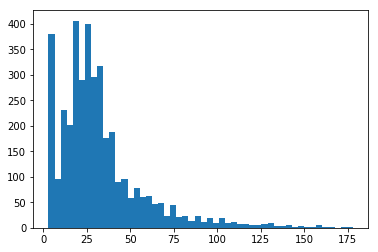

In [6]:
train_path = 'ResumeNER/train.char.bmes'
max_min_mean_std(train_path)

('最大长度：178', '最小长度：4', '标准差：22.80473975969819')

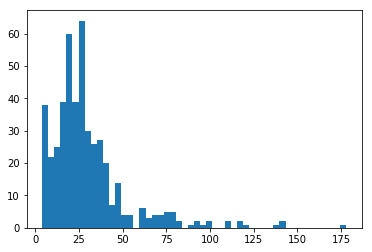

In [7]:
train_path = 'ResumeNER/dev.char.bmes'
max_min_mean_std(train_path)

('最大长度：167', '最小长度：4', '标准差：26.039383744191905')

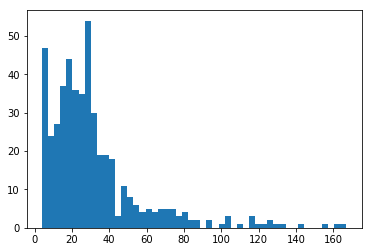

In [8]:
train_path = 'ResumeNER/test.char.bmes'
max_min_mean_std(train_path)

In [9]:
def get_labels(path):
    labels = set()  # 这里用集合来存储标签，起到去重复的作用
    with open(path, 'r', encoding='utf-8') as f:
        for row in f.readlines():  # 读取每一行
            if row.strip():  # 去掉每行的换行符
                labels.add(row.strip().split()[1])  # 把标签添加到集合中
    return f'一共有{len(labels)}个标签。', list(labels)  # 以列表的形式返回

In [10]:
train_path = 'ResumeNER/train.char.bmes'
print(len(get_labels(train_path)))
print(get_labels(train_path))

2
('一共有28个标签。', ['M-TITLE', 'B-RACE', 'B-EDU', 'M-PRO', 'B-LOC', 'E-ORG', 'M-CONT', 'E-PRO', 'E-TITLE', 'B-NAME', 'M-LOC', 'E-LOC', 'S-NAME', 'O', 'E-NAME', 'E-EDU', 'B-PRO', 'S-ORG', 'S-RACE', 'E-CONT', 'M-ORG', 'M-EDU', 'B-TITLE', 'E-RACE', 'B-ORG', 'M-NAME', 'B-CONT', 'M-RACE'])


In [29]:
def get_labels_num(path):
    label_to_num = {}
    f = open(path, 'r', encoding='utf-8')
    for row in f.readlines():  # 读取每一行
        if not row.strip(): continue  # 过滤空行
        label = row.strip().split()[1]  # 取出带有位置标识符的实体，
        if label.startswith('B') or label.startswith('S'):
            label = label.strip().split('-')[1]
            if label not in label_to_num:
                label_to_num[label] = 1
            else:
                label_to_num[label] += 1
    f.close()
    return label_to_num

In [32]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
def show_column_chart(data):
    waters = [d[0] for d in data.items()]
    buy_number = [d[1] for d in data.items()]
    plt.bar(waters, buy_number)
    # 在mac运行 该代码需要指定字体路径
    fp = FontProperties(fname='/System/Library/Fonts/PingFang.ttc')
    plt.title('实体数量统计直方图', fontproperties=fp)
    plt.show()

{'NAME': 952, 'CONT': 260, 'RACE': 115, 'TITLE': 6308, 'EDU': 858, 'ORG': 4611, 'PRO': 287, 'LOC': 47}


/Users/lmq/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


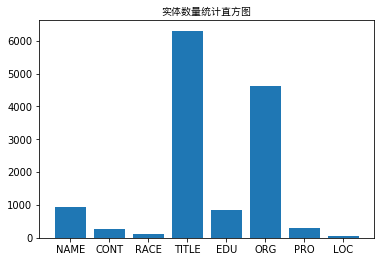

In [33]:
print(get_labels_num(train_path))
show_column_chart(get_labels_num(train_path))

{'NAME': 110, 'CONT': 33, 'EDU': 106, 'TITLE': 690, 'ORG': 523, 'RACE': 15, 'PRO': 18, 'LOC': 2}


/Users/lmq/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


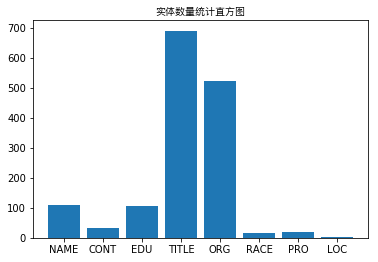

In [34]:
print(get_labels_num(dev_path))
show_column_chart(get_labels_num(dev_path))

{'NAME': 112, 'PRO': 33, 'EDU': 112, 'TITLE': 772, 'ORG': 553, 'CONT': 28, 'RACE': 14, 'LOC': 6}


/Users/lmq/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


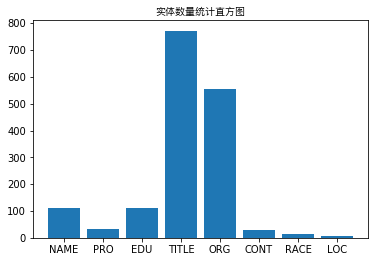

In [35]:
print(get_labels_num(test_path))
show_column_chart(get_labels_num(test_path))